## QUAAF Python for Finance Crash Course Part 2: So You Wanna Be a Quant?
### Basic Technical Analysis

In [1]:
#Importing packages
import numpy as np 
import pandas as pd
from pandas_datareader import data #This is the package that we use to pull finanical data from the web
import matplotlib.pyplot as plt #Basic plotting package
import seaborn as sns #If you really want to flex always import seaborn whenever you import matplotlib for fancier plots
sns.set_style('darkgrid') #Everybody loves darkgrid
import pandas as pd #Pandas is THE package for working with and manipulating dataframes; if you can do it in excel, you can do it in pandas
from datetime import date #Gives python access to your systems date and time for realtime charts

#Once again we're gonna pull some live share price data from an online source (yahoo finance in this case for simplicity)

#You can pull in data this way from just about anywhere (full-list available at https://pandas-datareader.readthedocs.io/en/latest/)

#Defining the equity we're interested in 
equity_ticker = ['TSLA']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
equity_data= data.DataReader(equity_ticker, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
equity_data.info()
equity_data.head(10)

/Users/BrandonToushan/anaconda/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2019-01-02 to 2020-07-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Symbols,TSLA
Date,
2019-01-02,310.119995
2019-01-03,300.359985
2019-01-04,317.690002
2019-01-07,334.959991
2019-01-08,335.350006
2019-01-09,338.529999
2019-01-10,344.970001
2019-01-11,347.260010
2019-01-14,334.399994


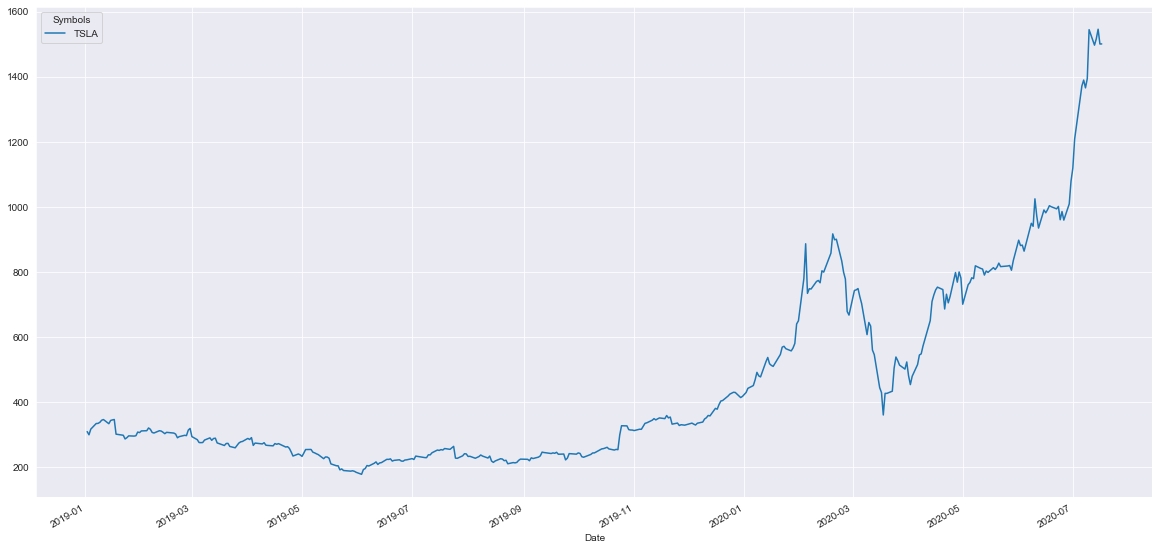

In [2]:
#Taking a glance at the chart for the equity in question
equity_data.plot(grid=True, figsize=(20, 10));

In [3]:
#Calculating 30 & 90 day rolling averages (again I know)
equity_data['TSLA 30d Rolling Avg'] = np.round(equity_data['TSLA'].rolling(window=30).mean(), 2) #30d rolling avg
equity_data['TSLA 90d Rolling Avg'] = np.round(equity_data['TSLA'].rolling(window=90).mean(), 2) #90d rolling avg
equity_data[['TSLA', 'TSLA 30d Rolling Avg', 'TSLA 90d Rolling Avg']].tail() #adding our new values to the end (tail) our data frame

Symbols,TSLA,TSLA 30d Rolling Avg,TSLA 90d Rolling Avg
Date,,,
2020-07-13,1497.060059,1069.65,800.84
2020-07-14,1516.800049,1090.27,809.64
2020-07-15,1546.010010,1112.42,819.00
2020-07-16,1500.640015,1133.01,828.92
2020-07-17,1500.839966,1154.23,838.42


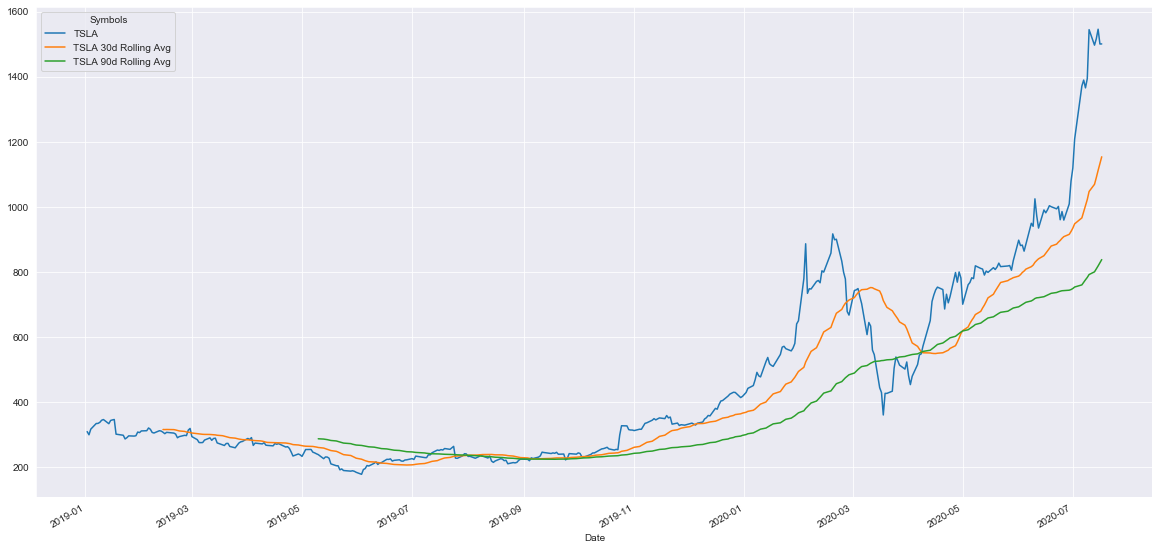

In [4]:
#Plotting again with our calculated rolling averages
equity_data[['TSLA','TSLA 30d Rolling Avg','TSLA 90d Rolling Avg']].plot(grid = True, figsize = (20,10));

In [5]:
#Now lets take this one step further and calculate the overall return & volatility of the share price
import math

#Return
equity_data['Return'] = np.log(equity_data['TSLA']/equity_data['TSLA'].shift(1))

#Now lets calculate the 30d moving volatility of the share price
equity_data['Mov_Volatility'] = equity_data['Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Checking df
print(equity_data.tail())

Symbols            TSLA  TSLA 30d Rolling Avg  TSLA 90d Rolling Avg    Return  \
Date                                                                            
2020-07-13  1497.060059               1069.65                800.84 -0.031294   
2020-07-14  1516.800049               1090.27                809.64  0.013100   
2020-07-15  1546.010010               1112.42                819.00  0.019075   
2020-07-16  1500.640015               1133.01                828.92 -0.029786   
2020-07-17  1500.839966               1154.23                838.42  0.000133   

Symbols     Mov_Volatility  
Date                        
2020-07-13        0.252283  
2020-07-14        0.246205  
2020-07-15        0.243364  
2020-07-16        0.247634  
2020-07-17        0.245063  


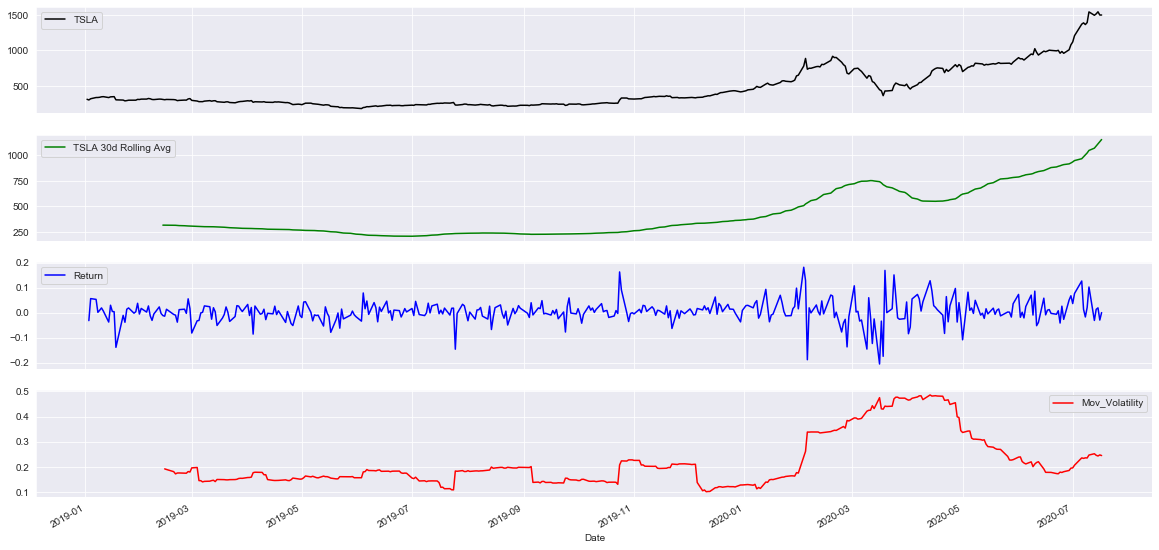

In [6]:
#Visualizing the results of our calcualtions above
equity_data[['TSLA','TSLA 30d Rolling Avg','Return','Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Basic Modelling & Correlation (S&P 500/VIX Example)

In [7]:
#Pulling in data just as before from Yahoo Finance (just to make our lives easier)

#Defining the tickers we want to take a better look at it
index_tickers = ['^VIX','^GSPC'] #in this case the S&P 500 & CBOE VIZ

#Pulling in data from the web using pandas data.dataReader and Yahoo Finance's API
index_data = data.DataReader(index_tickers, 
                       start='2020-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source = 'yahoo')['Adj Close'] #obtaining price at close

#Taking a look at the last (most recent) datapoints in our df
index_data.tail()

Symbols,^VIX,^GSPC
Date,,
2020-07-13,32.189999,3155.219971
2020-07-14,29.520000,3197.520020
2020-07-15,27.760000,3226.560059
2020-07-16,28.000000,3215.570068
2020-07-17,25.680000,3224.729980


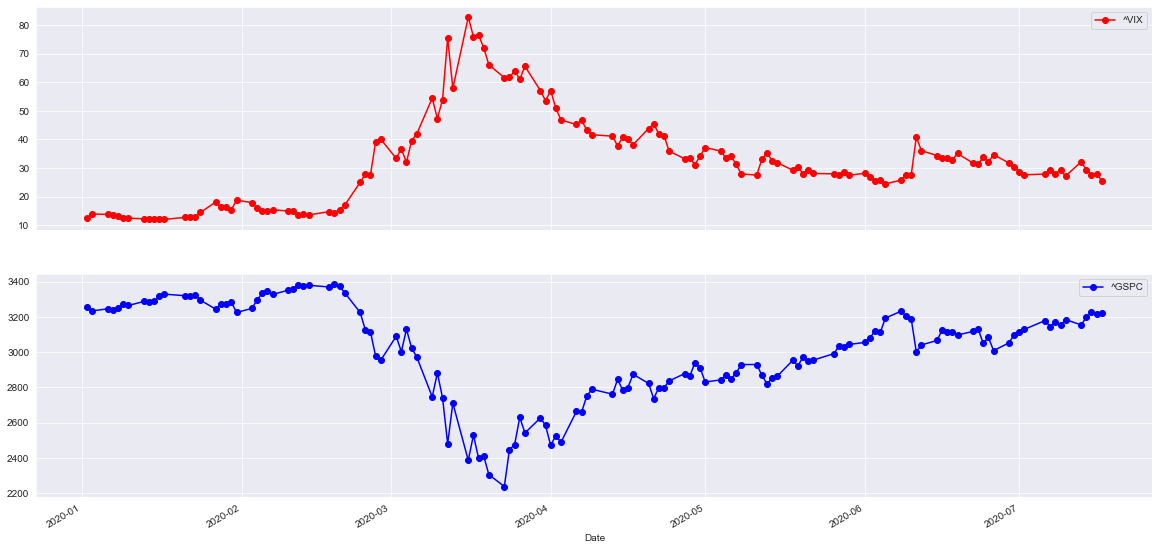

In [8]:
#Quick and dirty visualization of our data to start with like always
index_data.plot(subplots=True, style=['ro-','bo-'], figsize=(20, 10));

In [9]:
#Now lets calculate returns for our tickers just like above
returns = np.log(index_data / index_data.shift(1)) #Creating a new df containing just the calculated returns of the tickers in index_data
returns.dropna(inplace = True) #Getting rid of any NaNs
returns.head()

Symbols,^VIX,^GSPC
Date,,
2020-01-03,0.117159,-0.007085
2020-01-06,-0.012200,0.003527
2020-01-07,-0.004342,-0.002807
2020-01-08,-0.024965,0.004890
2020-01-09,-0.070056,0.006633


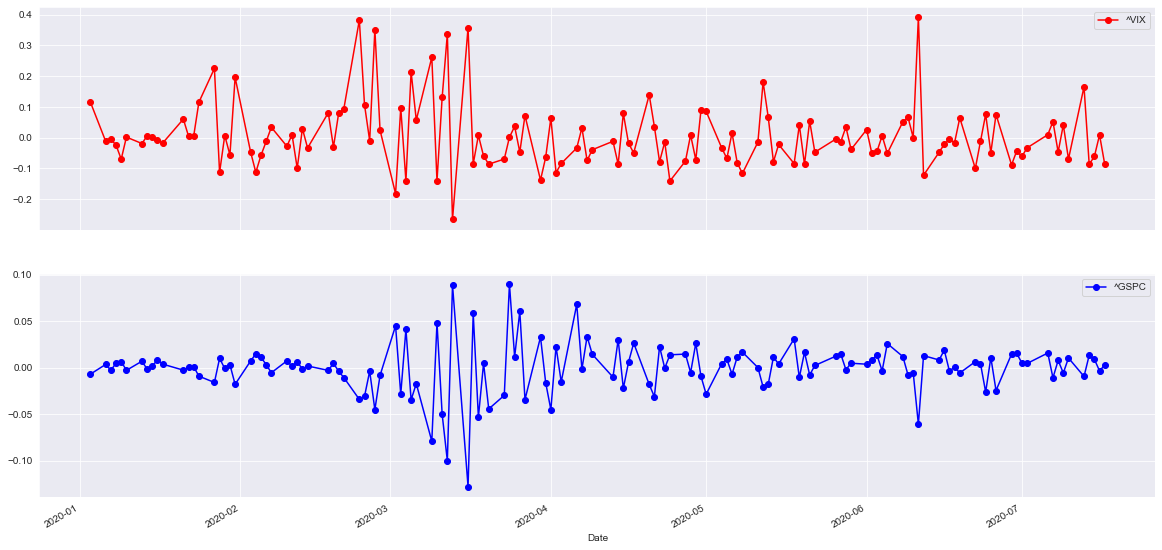

In [10]:
#Plotting the results
returns.plot(subplots=True, style=['ro-','bo-'], figsize=(20, 10));

In [11]:
###Now we're gonna fit a simple Linear Regression to our data and find the correlation between the S&P and VIX

###On the quant side this kind of procedure can be very useful for taking a look at just what factors are really effecting
###your companies share price. This exact API and methodology can be used to pull in and calculate correlations for just about
###any economic data in existence from jet fuel prices to forex futures and as a result is extremely powerful

#Extracting values from our 'returns' dataframe
xdata = returns['^GSPC'].values #for this case we will say the S&P is the independent variable (our x var)
ydata = returns['^VIX'].values #and VIX is our dependent variable (our y var)
regression = np.polyfit(x=xdata, y=ydata, deg=1) 

#np.polyfit fits a simple least squares polynomial to the data,
#you don't need to know the ins and outs of what this means but essentially it draws a line that best fits the
#data (as you'll see below) deg = 1 is a straight line, deg = 2 is a quadratic, deg = 3 is a cubic and so on

#Printing out the results of our (extremely basic) model
regression

array([-2.84344727,  0.00509803])

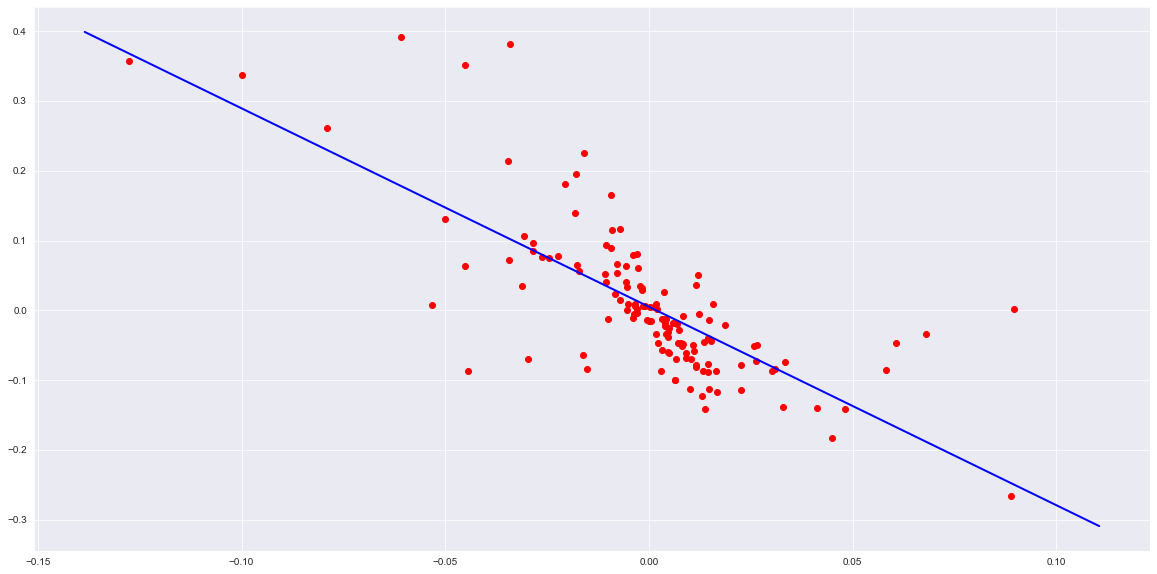

In [12]:
#Visualizing the linear model we just fit above
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(xdata, ydata, 'ro')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(regression, x), 'b', lw=2);

In [13]:
#Calculating the correlation between the two
returns.corr()

Symbols,^VIX,^GSPC
Symbols,,
^VIX,1.000000,-0.744574
^GSPC,-0.744574,1.000000


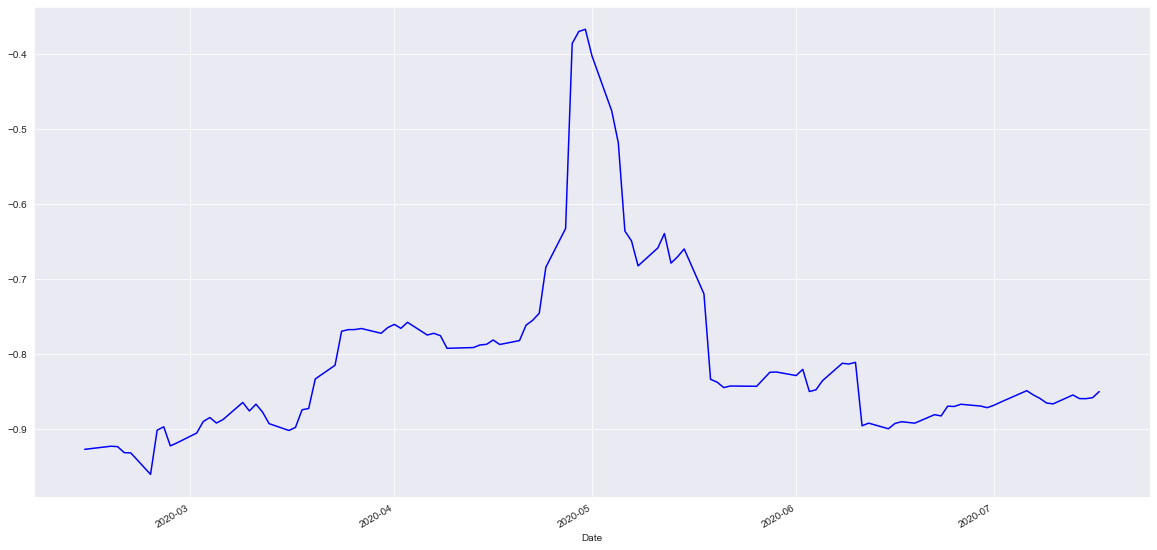

In [14]:
#Plotting the correlation between the two
returns['^GSPC'].rolling(window=30).corr(returns['^VIX']).plot(figsize = (20,10),c='b');

### (Very) Basic Porftolio Optimization in Python

#### Data Preprocessing & Setup

In [15]:
###We're gonna end this exercise with a simple portfolio optimization case
###taking a look at a basket of stocks (in this case the tech sector)

#defining the equities we want in our portfolio
portfolio_tickers = ['MSFT','GOOG','FB','NFLX','AAPL']
size_portfolio = len(portfolio_tickers) #Calculating the size of our portfolio (in this case 5)

#getting the most up to date data we can
today = date.today() #this function automatically updates with today's data


#pulling the timeseries data directly from yahoo finance into a dataframe
portfolio_data= data.DataReader(portfolio_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#checking the 20 most recent values
portfolio_data.info()
portfolio_data.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2019-01-02 to 2020-07-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    389 non-null    float64
 1   GOOG    389 non-null    float64
 2   FB      389 non-null    float64
 3   NFLX    389 non-null    float64
 4   AAPL    389 non-null    float64
dtypes: float64(5)
memory usage: 18.2 KB


Symbols,MSFT,GOOG,FB,NFLX,AAPL
Date,,,,,
2019-01-02,99.099190,1045.849976,135.679993,267.660004,154.794983
2019-01-03,95.453529,1016.059998,131.740005,271.200012,139.376251
2019-01-04,99.893005,1070.709961,137.949997,297.570007,145.326126
2019-01-07,100.020401,1068.390015,138.050003,315.339996,145.002686
2019-01-08,100.745613,1076.280029,142.529999,320.269989,147.766861
2019-01-09,102.186226,1074.660034,144.229996,319.959991,150.276199
2019-01-10,101.529633,1070.329956,144.199997,324.660004,150.756531
2019-01-11,100.745613,1057.189941,143.800003,337.589996,149.276382
2019-01-14,100.010605,1044.689941,145.389999,332.940002,147.031708


In [16]:
#Lets skip the plotting this time and get right into calculating returns
portfolio_returns = np.log(portfolio_data/portfolio_data.shift(1))

#Calculating average return over a year's worth of trading
portfolio_returns.mean()*253

#Calculating covariance over a years's worth of trading
portfolio_returns.cov()*253

Symbols,MSFT,GOOG,FB,NFLX,AAPL
Symbols,,,,,
MSFT,0.123379,0.094690,0.098427,0.082763,0.108727
GOOG,0.094690,0.109223,0.096590,0.074688,0.095044
FB,0.098427,0.096590,0.142360,0.081061,0.099708
NFLX,0.082763,0.074688,0.081061,0.165780,0.077342
AAPL,0.108727,0.095044,0.099708,0.077342,0.136836


### Basic Theory (Calculating Expected Return, Var & Vol for One Possible Portfolio)

In [17]:
#Creating random position weights
weights = np.random.random(size_portfolio) #creating random position percentages
weights = weights/np.sum(weights) #scaling weights
weights

array([0.26037422, 0.07429325, 0.2799107 , 0.21920292, 0.16621892])

In [18]:
#Calculating expected portfolio return with random weights
np.sum(portfolio_returns.mean()*weights)*253

0.43139294897103025

In [19]:
#Calculating expected portfolio variance with random weights

#Taking the dot product of the transpose weights array and the portfolio returns matrix
np.dot(weights.T, np.dot(portfolio_returns.cov() * 253, weights))

0.10239522034042325

In [20]:
#Calculating expected portfolio volatility with random weights
np.sqrt(np.dot(weights.T, np.dot(portfolio_returns.cov() * 253, weights)))

0.319992531694762

### Getting Fancier (Calculating Expected Return, Var & Vol for Five Thousand [5000] Possible Portfolios at Once)

In [21]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (5000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(portfolio_returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(portfolio_returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

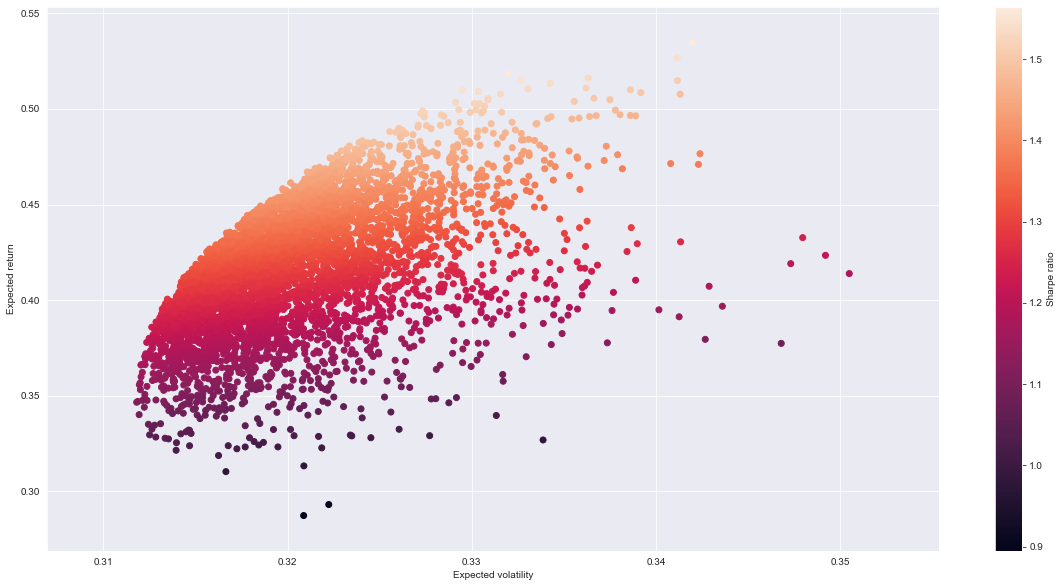

In [22]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Now Getting Useful (Optimizing Our Portfolio)

In [23]:
###We're gonna use Python's built in scipy package to optimize our tech portfolio

#First thing's first is we're gonna define a function that takes in portfolio weights
#and spits out the results of the calculations we did above, (think for loop but taken one step further)
import statistics

#Once a function is created in python like so it can be called again and again at your leisure
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(portfolio_returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(portfolio_returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])
#The return line defines what the function spits out (in this case an array of the results we've been calculating above)

In [24]:
import scipy.optimize as sco

#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

In [25]:
#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [26]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL SHARPE RATIO PORTFOLIO')
print((opts_Sharpe['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL SHARPE RATIO PORTFOLIO
[0.    0.    0.    0.112 0.888]
[0.57265051 0.35406877 1.61734263]


In [27]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [28]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL VARIANCE PORTFOLIO')
print((opts_variance['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print(stats(opts_variance['x'].round(3)))

OPTIMAL VARIANCE PORTFOLIO
[0.139 0.468 0.077 0.225 0.09 ]
[0.35032672 0.31144072 1.12485845]


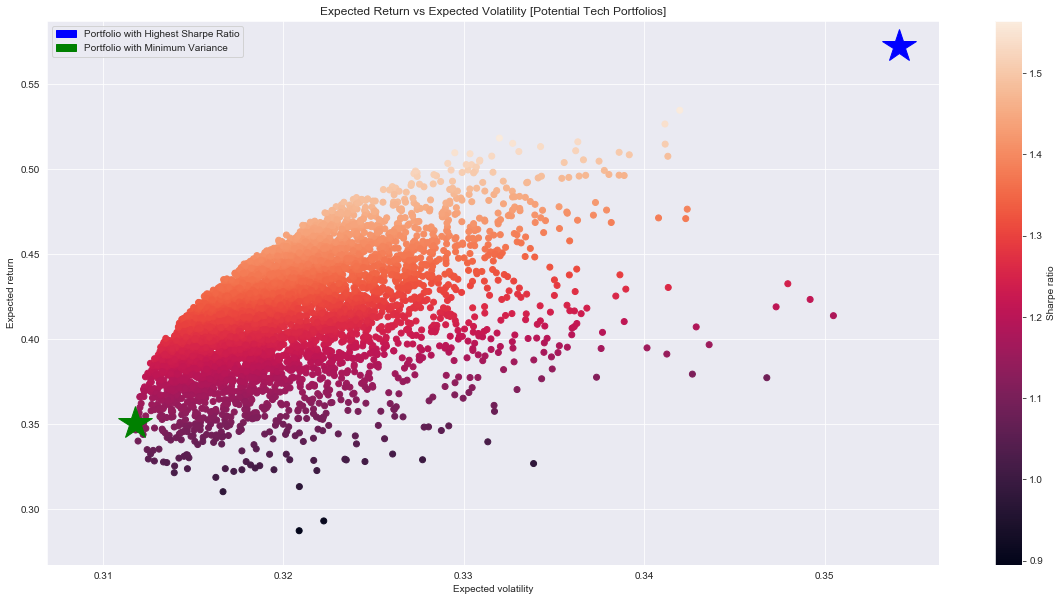

In [29]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'b*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
blue = mpatches.Patch(color='b', label='Portfolio with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='Portfolio with Minimum Variance')
plt.legend(handles=[blue,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential Tech Portfolios]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');